# Instructor Do: Intro to the ROC Curve and AUC

In this activity, students will learn how to measure the performance of a binary classification model by fetching metrics from Keras, as well as plotting and interpreting the ROC curve and AUC.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline

## The Dataset

The data provided for this demo contains anonymous information about `284807` credit card transactions made by European credit cardholders in September 2013.

The dataset is going to be used to create a binary classification model using a deep neural network to detect fraudulent transactions. It contains nine numerical variables, which are the result of PCA transformation to protect the confidentiality of credit cardholders. Only the transaction amount can be seen as is.

This dataset is an abstract of the file shared by the [Machine Learning Group](http://mlg.ulb.ac.be) of the Université Libre de Bruxelles (ULB).

In [2]:
# Import the dataset
# Note : This data is in the form of a principal components V1, V2 ...(to protect the customer privacy)
# note : 
file_path = Path('../Resources/transactions.csv')
transactions_df = pd.read_csv(file_path)
transactions_df.head() 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,69.99,0


## Data Preprocessing

In [3]:
# Creating the X and y sets
X = transactions_df.iloc[:, 0:10].values
y = transactions_df["Class"].values

In [4]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [5]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


## Build and Train the Deep Learning Model

 ### Importing the Keras Modules

In [6]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

 ### Setting Up the Model

In [7]:
# Model set-up
features = 10
nodes_layer1 = 15
nodes_layer2 = 5
nodes_outputlayer = 1

 ### Defining the Model's Structure

In [8]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(
        units=nodes_layer1, 
        input_dim = features,
        activation='relu'
    )
)

# Layer 2
model.add(
    Dense(
        units=nodes_layer2,
        input_dim = features,
        activation='relu'
    )
)

# Output layer
model.add(
    Dense(
        units=nodes_outputlayer, 
        activation='sigmoid'
    )
)



 ### Compiling the Model

In [9]:
# Compile the model
# Note : we can observe the metrics as it runs
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy',
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.TrueNegatives(name='tn'),
        tf.keras.metrics.FalsePositives(name='fp'),
        tf.keras.metrics.FalseNegatives(name='fn'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        ],
)

In [10]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 ### Training the Model

In [11]:
# Training the model
# to better the model, we could have added more epochs, could add more layers, 
# changeing activation functions for diff layer
# we can use diff optimization 

batch_size = 1000 # how many rows of data is fed to the model 
epochs = 50
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val), # random rows selected for validation
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)


Epoch 1/50
161/161 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.9777 - tp: 2.0000 - tn: 156630.0000 - fp: 3316.0000 - fn: 255.0000 - precision: 6.0277e-04 - recall: 0.0078 - auc: 0.1043 - val_loss: 0.1569 - val_accuracy: 0.9980 - val_tp: 0.0000e+00 - val_tn: 53297.0000 - val_fp: 0.0000e+00 - val_fn: 105.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4148
Epoch 2/50
161/161 [==============================] - 0s 686us/step - loss: 0.0504 - accuracy: 0.9984 - tp: 0.0000e+00 - tn: 159944.0000 - fp: 2.0000 - fn: 257.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.1698 - val_loss: 0.1664 - val_accuracy: 0.9980 - val_tp: 0.0000e+00 - val_tn: 53297.0000 - val_fp: 0.0000e+00 - val_fn: 105.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4570
Epoch 3/50
161/161 [==============================] - 0s 680us/step - loss: 0.0213 - accuracy: 0.9984 - tp: 1.0000 - tn: 159941.0000 - fp: 5.0000 - fn: 256.0000 - precis

In [12]:
### training_history.history.epochs
training_history.history['val_loss']


[0.15688671171665192,
 0.1664244830608368,
 0.18285788595676422,
 0.1951972395181656,
 0.19838601350784302,
 0.1952783614397049,
 0.18514405190944672,
 0.16915512084960938,
 0.15346793830394745,
 0.1361897587776184,
 0.12083788961172104,
 0.10456254333257675,
 0.08963286131620407,
 0.07637075334787369,
 0.06964710354804993,
 0.0621771477162838,
 0.05588628724217415,
 0.05176381394267082,
 0.04814644157886505,
 0.04619356617331505,
 0.04544691741466522,
 0.04498019814491272,
 0.04582494497299194,
 0.04774519056081772,
 0.05006685107946396,
 0.053850989788770676,
 0.05287810042500496,
 0.05922645702958107,
 0.05800122022628784,
 0.056670598685741425,
 0.05596578121185303,
 0.05270959436893463,
 0.05047536641359329,
 0.05200058966875076,
 0.049429889768362045,
 0.049329955130815506,
 0.04972602427005768,
 0.048599161207675934,
 0.04723755270242691,
 0.04903619363903999,
 0.04835524037480354,
 0.04717855155467987,
 0.04979432374238968,
 0.05039500072598457,
 0.053033266216516495,
 0.051752

### Model Performance

#### Checking Training History

<Axes: title={'center': 'Loss'}, xlabel='Epoch'>

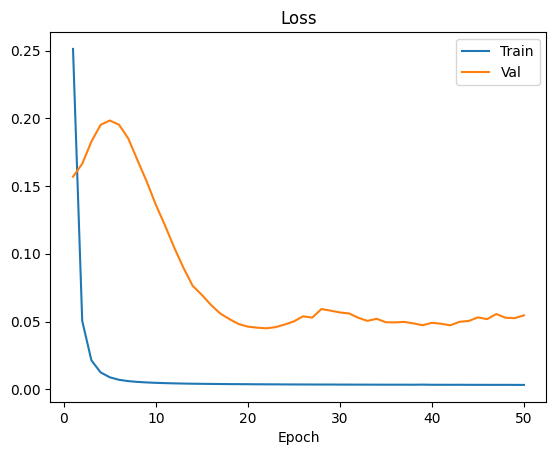

In [13]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

<Axes: title={'center': 'Accuracy'}, xlabel='Epoch'>

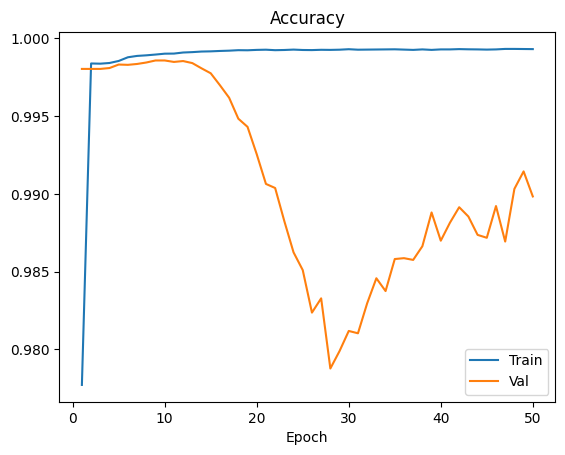

In [14]:
# Plotting accuracy
# Cloassification
# it has a pretty high accuracy, this shows that the model is over fit on the validation data.
# it is binary classification data and it has imbalanced classes, hence it is has a high accuracy
# we can check Imbalance data, precession, recall, sensitivity, specificity. 
# Just accuracy is not good enough here.
# In what way is it wrong or right.

accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

<Axes: title={'center': 'AUC'}, xlabel='Epoch'>

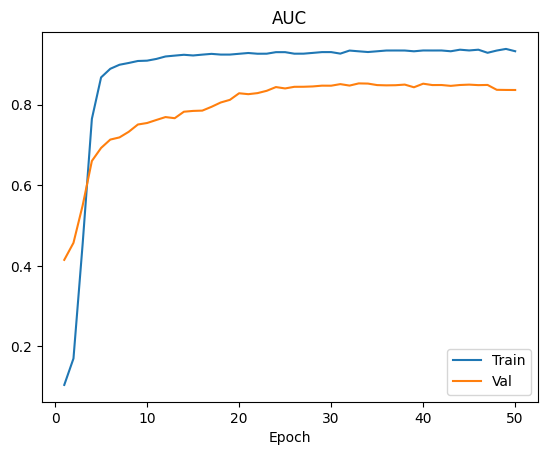

In [15]:
# Plotting AUC

auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

#### Plotting the ROC Curve

In [62]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_auc_score 


In [63]:
# Making predictions to feed the roc_curve module
train_predictions = model.predict(X_train, batch_size=1000)
test_predictions = model.predict(X_test, batch_size=1000)

In [67]:
# Calculate the ROC curve and AUC for the training set
# notes fpr = false positive rate, tpr = tru positive rate
# as we sweep throught the thresholds what happens to the fpr and tpr
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)
print(auc_train)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = round(auc(fpr_test, tpr_test), 4) 
print(auc_test)


0.9773
0.7634


In [73]:
# Create a DataFrame with the fpr and tpr results

roc_df_train = pd.DataFrame({'FPR Train' : fpr_train, 'TPR Train' : tpr_train})
roc_df_test = pd.DataFrame({'FPR Test' : fpr_test, 'TPR Test' : tpr_test})

print(roc_df_train)
print(roc_df_test)

       FPR Train  TPR Train
0       0.000000   0.000000
1       0.000000   0.003891
2       0.000006   0.003891
3       0.000094   0.474708
4       0.000094   0.509728
...          ...        ...
13601   0.998506   1.000000
13602   0.998518   1.000000
13603   0.998525   1.000000
13604   0.998537   1.000000
13605   1.000000   1.000000

[13606 rows x 2 columns]
      FPR Test  TPR Test
0     0.000000  0.000000
1     0.000014  0.000000
2     0.000014  0.007692
3     0.000028  0.007692
4     0.000872  0.338462
...        ...       ...
4456  0.981413  0.961538
4457  0.981526  0.961538
4458  0.981554  0.961538
4459  0.981582  0.961538
4460  1.000000  1.000000

[4461 rows x 2 columns]


<AxesSubplot:title={'center':'Test ROC Curve AUC = 0.7634'}, xlabel='FPR Test'>

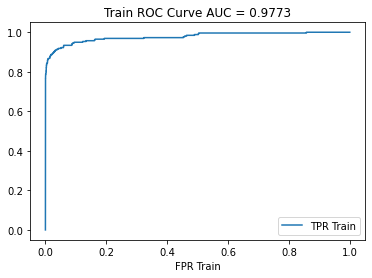

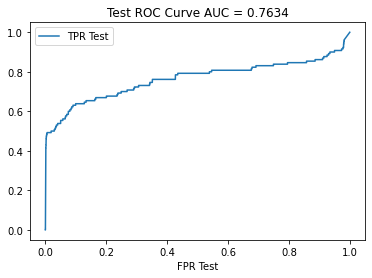

In [87]:
# Plotting the ROC Curves
roc_df_train.plot(
    x='FPR Train',
    y='TPR Train',
    xlim=([-0.05, 1.05]),
    title = f"Train ROC Curve AUC = {auc_train}"
)


roc_df_test.plot(
    x='FPR Test',
    y='TPR Test',
    title = f'Test ROC Curve AUC = {auc_test}'
)




#### Evaluate the Model

In [95]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

print(model.metrics_names)
print(scores)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)


['loss', 'accuracy', 'tp', 'tn', 'fp', 'fn', 'precision', 'recall', 'auc']
[0.04369543120265007, 0.9964467287063599, 60.0, 70889.0, 183.0, 70.0, 0.2469135820865631, 0.4615384638309479, 0.7883561849594116]


{'loss': 0.04369543120265007,
 'accuracy': 0.9964467287063599,
 'tp': 60.0,
 'tn': 70889.0,
 'fp': 183.0,
 'fn': 70.0,
 'precision': 0.2469135820865631,
 'recall': 0.4615384638309479,
 'auc': 0.7883561849594116}

#### Confusion Matrix

In [104]:
# Define the confusion matrix data

cm_df = pd.DataFrame(
    {
        'Positive (1)' : [ {metrics['tp']}, {metrics['fn']} ],
        'Negative (0)' : [ {metrics['fp']}, {metrics['tn']} ] 

    },
    index = ['Positive (1)' , 'Negative(0)'],
)

cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive (1),{60.0},{183.0}
Negative(0),{70.0},{70889.0}


#### Classification Report

In [108]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = (model.predict(X_test) > 0.5).astype('int32')

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70959
           1       0.46      0.25      0.32       243

    accuracy                           1.00     71202
   macro avg       0.73      0.62      0.66     71202
weighted avg       1.00      1.00      1.00     71202

